# LSOA boundary

In [1]:
import pandas as pd

# Read the original CSV file
df = pd.read_csv('data/lsoa_boundary.csv')

# Define Greater Manchester boroughs
gm_boroughs = [
    "Manchester", "Bolton", "Bury", "Oldham", "Rochdale",
    "Salford", "Stockport", "Tameside", "Trafford", "Wigan"
]

# Filter rows for Greater Manchester
gm_mask = df['LSOA21NM'].apply(lambda name: any(borough in name for borough in gm_boroughs) if isinstance(name, str) else False)
gm_df = df[gm_mask]

print(f"Filtered data: {len(gm_df)} rows")

# Save to a new CSV file
gm_df.to_csv('gm_lsoa_boundary.csv', index=False)
print('Filtered CSV file saved as gm_lsoa_boundary.csv')

Filtered data: 1702 rows
Filtered CSV file saved as gm_lsoa_boundary.csv


# LSOA shapefile

In [ ]:
import geopandas as gpd
lsoa = gpd.read_file("data/lsoa_shape/Lower_layer_Super_Output_Areas_(December_2021)_Boundaries_EW_BFC_(V10).shp")
gm_districts = [
    'Bolton',
    'Bury',
    'Manchester',
    'Oldham',
    'Rochdale',
    'Salford',
    'Stockport',
    'Tameside',
    'Trafford',
    'Wigan'
]

# Get the district name before the last space
lsoa['district'] = lsoa['LSOA21NM'].str.rsplit(' ', n=1).str[0]

# Now filter
gm_lsoa = lsoa[lsoa['district'].isin(gm_districts)]

gm_lsoa.to_file("data/gm_shape/gm_shape.shp")

In [ ]:
# Example code to convert your shapefile to WGS84 before processing
gm_lsoa = gpd.read_file("data/gm_shape/gm_shape.shp")
gm_lsoa_4326 = gm_lsoa.to_crs("EPSG:4326")
gm_lsoa_4326.to_file("data/gm_shape_wgs84/gm_lsoa_wgs84.shp")

# GM OA lookup

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = 'data/oa_lookup.xlsx'
df = pd.read_excel(file_path)

# Print basic information about the dataset
print(f"Total rows in dataset: {len(df)}")
print(f"Columns in dataset: {df.columns.tolist()}")

# List of Greater Manchester local authorities
gm_authorities = [
    "Bolton", "Bury", "Manchester", "Oldham", "Rochdale",
    "Salford", "Stockport", "Tameside", "Trafford", "Wigan"
]

# Method 1: Filter using string contains
# This method checks if the LAD22NM column contains any of the GM authority names
# gm_data = df[df['LAD22NM'].str.contains('|'.join(gm_authorities), na=False)]

# Method 2: Alternative using exact matching (more precise)
gm_data = df[df['LAD22NM'].isin(gm_authorities)]

# Print information about the filtered dataset
print(f"\nRows matching Greater Manchester: {len(gm_data)}")

# Count data points by area/resolution
authority_counts = gm_data['LAD22NM'].value_counts().reset_index()
authority_counts.columns = ['Local Authority', 'Count']
print("\nCount of data points by Greater Manchester authority:")
print(authority_counts)

# Check unique areas in Greater Manchester
unique_lsoas = gm_data['LSOA21CD'].nunique()
unique_msoas = gm_data['MSOA21CD'].nunique()
print(f"\nNumber of unique LSOAs in Greater Manchester: {unique_lsoas}")
print(f"\nNumber of unique MSOAs in Greater Manchester: {unique_msoas}")

# Create a summary dataframe
summary_data = []
for authority in gm_authorities:
    authority_data = gm_data[gm_data['LAD22NM'] == authority]
    oas_count = len(authority_data)
    lsoas_count = authority_data['LSOA21CD'].nunique()
    msoas_count = authority_data['MSOA21CD'].nunique()

    summary_data.append({
        'Authority': authority,
        'Output Areas': oas_count,
        'LSOAs': lsoas_count,
        'MSOAs': msoas_count
    })

summary_df = pd.DataFrame(summary_data)

# Add a total row
total_row = {
    'Authority': 'Total',
    'Output Areas': summary_df['Output Areas'].sum(),
    'LSOAs': summary_df['LSOAs'].sum(),
    'MSOAs': summary_df['MSOAs'].sum()
}
summary_df = pd.concat([summary_df, pd.DataFrame([total_row])], ignore_index=True)

print("\nSummary by Local Authority:")
print(summary_df)

# Save filtered data to a new Excel file
output_file = 'data/gm_oa_lookup.xlsx'
with pd.ExcelWriter(output_file) as writer:
    gm_data.to_excel(writer, sheet_name='Greater_Manchester', index=False)
    summary_df.to_excel(writer, sheet_name='Summary', index=False)

print(f"\nFiltered data saved to {output_file}")

# Create a visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='Local Authority', y='Count', data=authority_counts)
plt.title('Distribution of Output Areas by Local Authority in Greater Manchester')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('data/gm_distribution.png')
plt.show()

Total rows in dataset: 14177
Columns in dataset: ['OA11CD', 'LAD15CD', 'LAD15NM', 'LSOA11CD', 'LSOA11NM', 'MSOA11CD', 'MSOA11NM', 'LEPOP14CD', 'LEPOP14NM', 'ObjectId']

Rows matching Greater Manchester: 0

Count of data points by Greater Manchester authority:
Empty DataFrame
Columns: [Local Authority, Count]
Index: []

Number of unique LSOAs in Greater Manchester: 0

Number of unique MSOAs in Greater Manchester: 0

Summary by Local Authority:
     Authority  Output Areas  LSOAs  MSOAs
0       Bolton             0      0      0
1         Bury             0      0      0
2   Manchester             0      0      0
3       Oldham             0      0      0
4     Rochdale             0      0      0
5      Salford             0      0      0
6    Stockport             0      0      0
7     Tameside             0      0      0
8     Trafford             0      0      0
9        Wigan             0      0      0
10       Total             0      0      0

Filtered data saved to data/gm_oa_lo

ValueError: min() arg is an empty sequence

<Figure size 1200x600 with 0 Axes>

# GM OA lookup 2011

Total rows in dataset: 14177
Columns in dataset: ['OA11CD', 'LAD15CD', 'LAD15NM', 'LSOA11CD', 'LSOA11NM', 'MSOA11CD', 'MSOA11NM', 'LEPOP14CD', 'LEPOP14NM', 'ObjectId']

Sample rows from dataset:
      OA11CD    LAD15CD         LAD15NM   LSOA11CD             LSOA11NM  \
0  E00088976  E07000004  Aylesbury Vale  E01017627  Aylesbury Vale 021A   
1  E00088977  E07000004  Aylesbury Vale  E01017627  Aylesbury Vale 021A   
2  E00088980  E07000004  Aylesbury Vale  E01017627  Aylesbury Vale 021A   
3  E00088981  E07000004  Aylesbury Vale  E01017627  Aylesbury Vale 021A   
4  E00088982  E07000004  Aylesbury Vale  E01017627  Aylesbury Vale 021A   

    MSOA11CD            MSOA11NM  LEPOP14CD  \
0  E02003672  Aylesbury Vale 021  E52000001   
1  E02003672  Aylesbury Vale 021  E52000001   
2  E02003672  Aylesbury Vale 021  E52000001   
3  E02003672  Aylesbury Vale 021  E52000001   
4  E02003672  Aylesbury Vale 021  E52000001   

                                           LEPOP14NM  ObjectId  
0  Buc

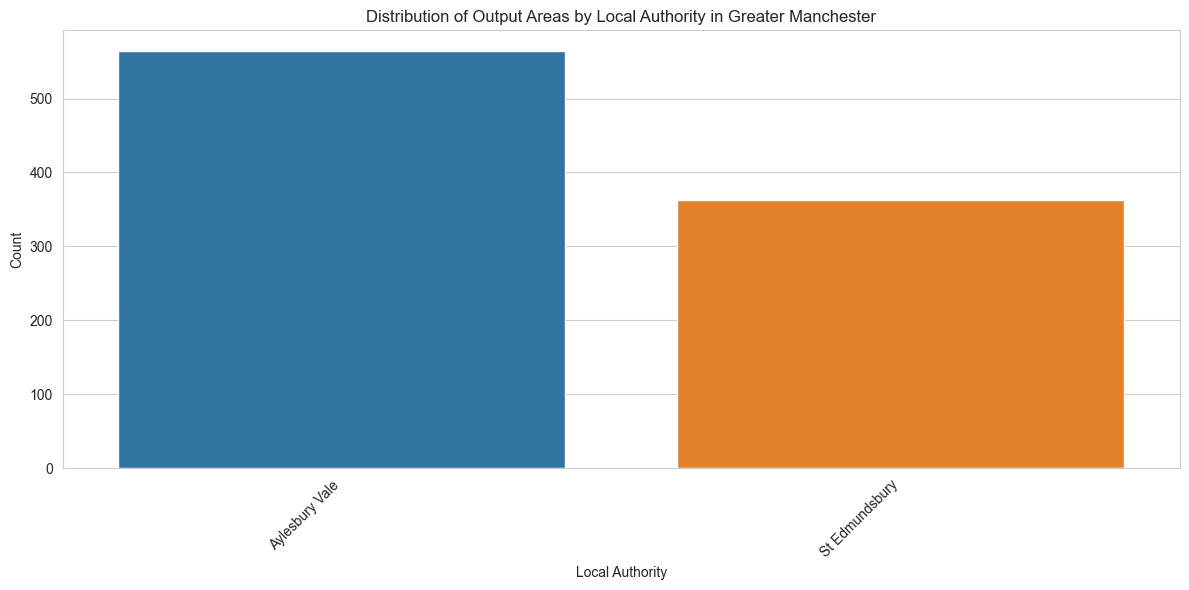

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'data/oa_lookup_2011.csv'
df = pd.read_csv(file_path)

# Print basic information about the dataset
print(f"Total rows in dataset: {len(df)}")
print(f"Columns in dataset: {df.columns.tolist()}")

# Print sample data to check how Greater Manchester areas are labeled
print("\nSample rows from dataset:")
print(df.head())

# Print unique values in the LAD15NM column to check how authorities are named
print("\nUnique values in LAD15NM column:")
print(df['LAD15NM'].unique())

# List of Greater Manchester local authorities - add variations of names as needed
gm_authorities = [
    "Bolton", "Bury", "Manchester", "Oldham", "Rochdale",
    "Salford", "Stockport", "Tameside", "Trafford", "Wigan",
    # Add potential variations
    "Bolton District", "Bury District", "Manchester District",
    "Oldham District", "Rochdale District", "Salford District",
    "Stockport District", "Tameside District", "Trafford District", "Wigan District"
]

# Try a more flexible matching approach
gm_data = pd.DataFrame()
for authority in gm_authorities:
    # Use case-insensitive partial matching
    matches = df[df['LAD15NM'].str.contains(authority, case=False, na=False)]
    gm_data = pd.concat([gm_data, matches])

# If still no matches, try matching in other columns
if len(gm_data) == 0:
    print("\nNo matches found in LAD15NM. Checking other columns...")
    # Check if there's another column that might contain the authority names
    for col in df.columns:
        if df[col].dtype == 'object':  # Only check string columns
            print(f"Checking column {col}...")
            for authority in gm_authorities:
                matches = df[df[col].str.contains(authority, case=False, na=False)]
                if len(matches) > 0:
                    print(f"Found {len(matches)} matches for {authority} in column {col}")
                    gm_data = pd.concat([gm_data, matches])

# Remove duplicates if any
gm_data = gm_data.drop_duplicates()

# Print information about the filtered dataset
print(f"\nRows matching Greater Manchester: {len(gm_data)}")

# If we have data, continue with the analysis
if len(gm_data) > 0:
    # Count data points by area/resolution
    authority_counts = gm_data['LAD15NM'].value_counts().reset_index()
    authority_counts.columns = ['Local Authority', 'Count']
    print("\nCount of data points by Greater Manchester authority:")
    print(authority_counts)

    # Check unique areas in Greater Manchester
    unique_lsoas = gm_data['LSOA11CD'].nunique()
    unique_msoas = gm_data['MSOA11CD'].nunique()
    print(f"\nNumber of unique LSOAs in Greater Manchester: {unique_lsoas}")
    print(f"\nNumber of unique MSOAs in Greater Manchester: {unique_msoas}")

    # Create a summary dataframe
    summary_data = []
    for authority in gm_data['LAD15NM'].unique():
        authority_data = gm_data[gm_data['LAD15NM'] == authority]
        oas_count = len(authority_data)
        lsoas_count = authority_data['LSOA11CD'].nunique()
        msoas_count = authority_data['MSOA11CD'].nunique()

        summary_data.append({
            'Authority': authority,
            'Output Areas': oas_count,
            'LSOAs': lsoas_count,
            'MSOAs': msoas_count
        })

    summary_df = pd.DataFrame(summary_data)

    # Add a total row
    total_row = {
        'Authority': 'Total',
        'Output Areas': summary_df['Output Areas'].sum(),
        'LSOAs': summary_df['LSOAs'].sum(),
        'MSOAs': summary_df['MSOAs'].sum()
    }
    summary_df = pd.concat([summary_df, pd.DataFrame([total_row])], ignore_index=True)

    print("\nSummary by Local Authority:")
    print(summary_df)

    # Save filtered data to a new Excel file
    output_file = 'data/gm_oa_lookup_2011.xlsx'
    with pd.ExcelWriter(output_file) as writer:
        gm_data.to_excel(writer, sheet_name='Greater_Manchester', index=False)
        summary_df.to_excel(writer, sheet_name='Summary', index=False)

    print(f"\nFiltered data saved to {output_file}")

    # Create a visualization
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Local Authority', y='Count', data=authority_counts)
    plt.title('Distribution of Output Areas by Local Authority in Greater Manchester')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('data/gm_distribution_2011.png')
    plt.show()
else:
    print("\nNo data found for Greater Manchester. Check if the local authority names match those in the dataset.")